#ML model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import re
import string
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection, naive_bayes, svm
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as creport
from sklearn.model_selection import train_test_split

from multiprocessing import Pool

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/hate.csv')

In [ ]:
df['Hate '].value_counts()


no     14861
yes     1103
Name: Hate , dtype: int64

In [ ]:
df['Offensive'].value_counts()


no     13171
yes     2793
Name: Offensive, dtype: int64

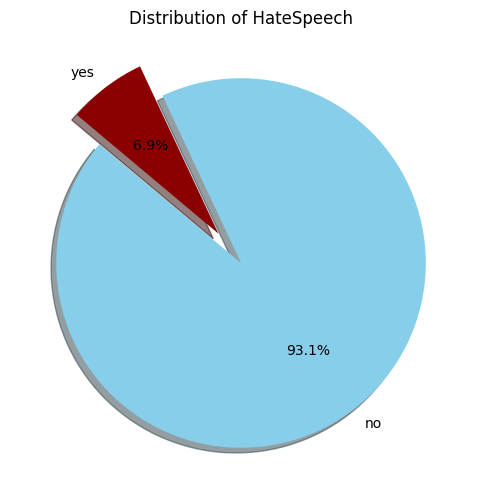

In [ ]:
import matplotlib.pyplot as plt
# Get value counts
offensive_counts = df['Hate '].value_counts()

# Plot
plt.figure(figsize=(8, 6))
explode=(0,.2)
offensive_counts.plot(kind='pie', autopct='%1.1f%%', explode=explode, startangle=140,shadow=True, colors=['skyblue', 'darkred'])
plt.title('Distribution of HateSpeech')
plt.ylabel('')  # This is to remove the column name from appearing beside the pie chart
plt.show()


In [ ]:
def clean(df):
    df = remove_diacritics(df)
    df = normalize_arabic(df)
    df = remove_punctuations(df)
    df = remove_repeating_char(df)
    df= remove_english_word_and_numbers(df)
    df=clean_space(df)
    return df

In [ ]:
arabic_punctuations = '''`÷« »×؛<>٩٨'٧٦٥٤٣٢١٠_()↗*•&^%][ـ،/:"؟.,'{}⋮≈~¦+|٪!”…“–ـ/[]%=#*+\•~@£·_{}©^®`→°€™›♥←×§″′Â█à…“★”–●â►−¢¬░¶↑±▾	═¦║―¥▓—‹─▒：⊕▼▪†■’▀¨▄♫☆é¯♦¤▲è¸Ã⋅‘∞∙）↓、│（»，♪╩╚³・╦╣╔╗▬❤ïØ¹≤‡₹´'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


In [ ]:
def remove_diacritics(df):
    df['info_text'] = df['info_text'].apply(lambda x: _remove_diacritics(x))
    return df
def _remove_diacritics(x):
    x = str(x)
    x = re.sub(arabic_diacritics, '', x)
    return x

def normalize_arabic(df):
    df['info_text'] = df['info_text'].apply(lambda x: _normalize_arabic(x))
    return df
def _normalize_arabic(x):
    x = str(x)
    # added space around puncts after replace
    x = re.sub("[إأآا]", "ا", x)
    x = re.sub("ى", "ي", x)
    x = re.sub("ؤ", "ء", x)
    x = re.sub("ئ", "ء", x)
    x = re.sub("ة", "ه", x)
    x = re.sub("گ", "ك", x)
    return x

def remove_punctuations(df):
    df['info_text'] = df['info_text'].apply(lambda x: _remove_punctuations(x))
    return df
def _remove_punctuations(x):
    x = str(x)
    #translator = str.maketrans(' ', ' ', punctuations_list)
    translator = str.maketrans(punctuations_list, ' '*len(punctuations_list))
    return x.translate(translator)

def remove_repeating_char(df):
    df['info_text'] = df['info_text'].apply(lambda x: _remove_repeating_char(x))
    return df
def _remove_repeating_char(x):
    x = str(x)
    return re.sub(r'(.)\1+', r'\1', x)

def remove_english_word_and_numbers(df):
    df['info_text'] = df['info_text'].apply(lambda x: _remove_english_word_and_numbers(x))
    return df
def _remove_english_word_and_numbers(x):
    x = str(x)
    return re.sub(r'[a-zA-Z0-9]+', '', x)

def clean_space(df):
    compiled_re = re.compile(r"\s+")
    df['info_text'] = df["info_text"].apply(lambda x: _clean_space(x, compiled_re))
    return df
def _clean_space(x, compiled_re):
    return compiled_re.sub(" ", x)

In [ ]:
num_cores = 2
def df_parallelize_run(df, func, num_cores=2):
    df_split = np.array_split(df, num_cores)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df


In [ ]:
df = df_parallelize_run(df, clean)


In [ ]:
num_cores = 2
def df_parallelize_run(df, func, num_cores=2):
    df_split = np.array_split(df, num_cores)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [ ]:
df = df_parallelize_run(df, clean)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer


In [ ]:
df=df[['info_text','Hate ', 'Offensive']]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Vectorization (Convert text data to numbers).

Count_vec = CountVectorizer(max_features=5000)
x = Count_vec.fit_transform(df['info_text'].apply(lambda x: np.str_(x)))

#data_features = Count_vec.fit_transform(df['text'])

data_features = x.toarray()

In [ ]:
X = data_features
y = df['Offensive']

In [ ]:
X_train, X_test, y_train, y_test =train_test_split (X, y, test_size=.4, random_state=0)


#Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8376135295959912
Confusion Matrix:
[[4965  282]
 [ 755  384]]
Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.95      0.91      5247
         yes       0.58      0.34      0.43      1139

    accuracy                           0.84      6386
   macro avg       0.72      0.64      0.67      6386
weighted avg       0.82      0.84      0.82      6386



#Gradient boost



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Create a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')



Accuracy: 0.8404321954274977
Confusion Matrix:
[[5211   36]
 [ 983  156]]
Classification Report:
              precision    recall  f1-score   support

          no       0.84      0.99      0.91      5247
         yes       0.81      0.14      0.23      1139

    accuracy                           0.84      6386
   macro avg       0.83      0.57      0.57      6386
weighted avg       0.84      0.84      0.79      6386



In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7943939868462261
Confusion Matrix:
[[4635  612]
 [ 701  438]]
Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.88      0.88      5247
         yes       0.42      0.38      0.40      1139

    accuracy                           0.79      6386
   macro avg       0.64      0.63      0.64      6386
weighted avg       0.79      0.79      0.79      6386



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a Support Vector Machine Classifier
model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8180394613216411
Confusion Matrix:
[[4769  480]
 [ 682  455]]
Classification Report:
              precision    recall  f1-score   support

          no       0.87      0.91      0.89      5249
         yes       0.49      0.40      0.44      1137

    accuracy                           0.82      6386
   macro avg       0.68      0.65      0.67      6386
weighted avg       0.81      0.82      0.81      6386



#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8477920450986534
Confusion Matrix:
[[5128  121]
 [ 851  286]]
Classification Report:
              precision    recall  f1-score   support

          no       0.86      0.98      0.91      5249
         yes       0.70      0.25      0.37      1137

    accuracy                           0.85      6386
   macro avg       0.78      0.61      0.64      6386
weighted avg       0.83      0.85      0.82      6386

